In [5]:
#Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
#Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Import the data
weather_data = pd.read_csv('weather_data_test.csv',parse_dates=['datetime'], sep=';', decimal=',' ,infer_datetime_format=True)
#Check the shape of the dataset
print(weather_data.shape)
#Select the datetime and the temperature columns
temp_df =  weather_data[["datetime", "T_mu"]]
temp_df.head(10)

(1346, 17)


,datetime,T_mu
0,2015-09-03,13.7375
1,2015-09-04,14.8250
2,2015-09-05,14.2750
3,2015-09-06,13.1250
4,2015-09-07,12.0875
5,2015-09-08,12.5375
6,2015-09-10,13.0625
7,2015-09-11,13.5375
8,2015-09-12,14.7500
9,2015-09-13,15.1375


In [7]:
# Select the subset data from 2015 to 2019
mask =  ((temp_df['datetime'] >= '2016-01-01') & (temp_df['datetime'] <= '2019-05-21') )
temp_df = temp_df.loc[mask]
# Reset the index 
temp_df.set_index("datetime", inplace=True)
# Inspect first 5 rows and last 5 rows of the data 
from IPython.display import display 
display (temp_df.head(5))
display(temp_df.tail(5))

,T_mu
datetime,
2016-01-01,-4.5500
2016-01-02,-7.0000
2016-01-03,-8.7375
2016-01-04,-11.1750
2016-01-05,-17.6250


,T_mu
datetime,
2019-05-17,13.783333
2019-05-18,15.508333
2019-05-19,16.595833
2019-05-20,17.258333
2019-05-21,18.433333


In [8]:
temp_df.describe()

,T_mu
count,1228.000000
mean,6.302811
std,8.433225
min,-22.675000
25%,0.559375
50%,5.227083
75%,13.784375
max,26.145833


In [9]:
# Output the maximum and minimum temperature date
print(temp_df.loc[temp_df["T_mu"] == temp_df ["T_mu"].max()]) 
print(temp_df.loc[temp_df ["T_mu"] == temp_df ["T_mu"].min()])

                 T_mu
datetime             
2018-07-17  26.145833
              T_mu
datetime          
2016-01-07 -22.675


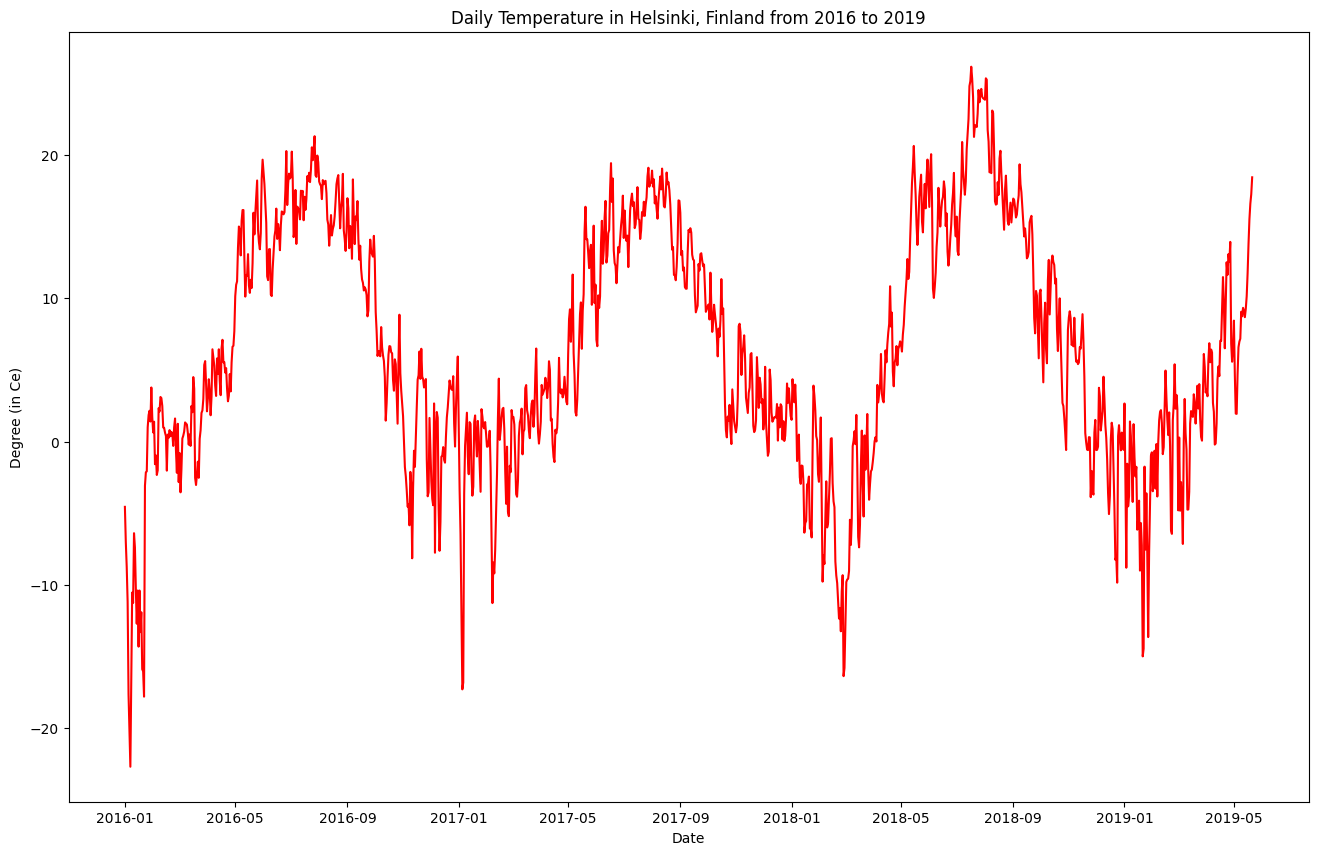

In [12]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.index, temp_df.T_mu, color='red')
plt.gca().set(title="Daily Temperature in Helsinki, Finland from 2016 to 2019", xlabel='Date', ylabel="Degree (in Ce)")
plt.show();

<Axes: xlabel='datetime'>

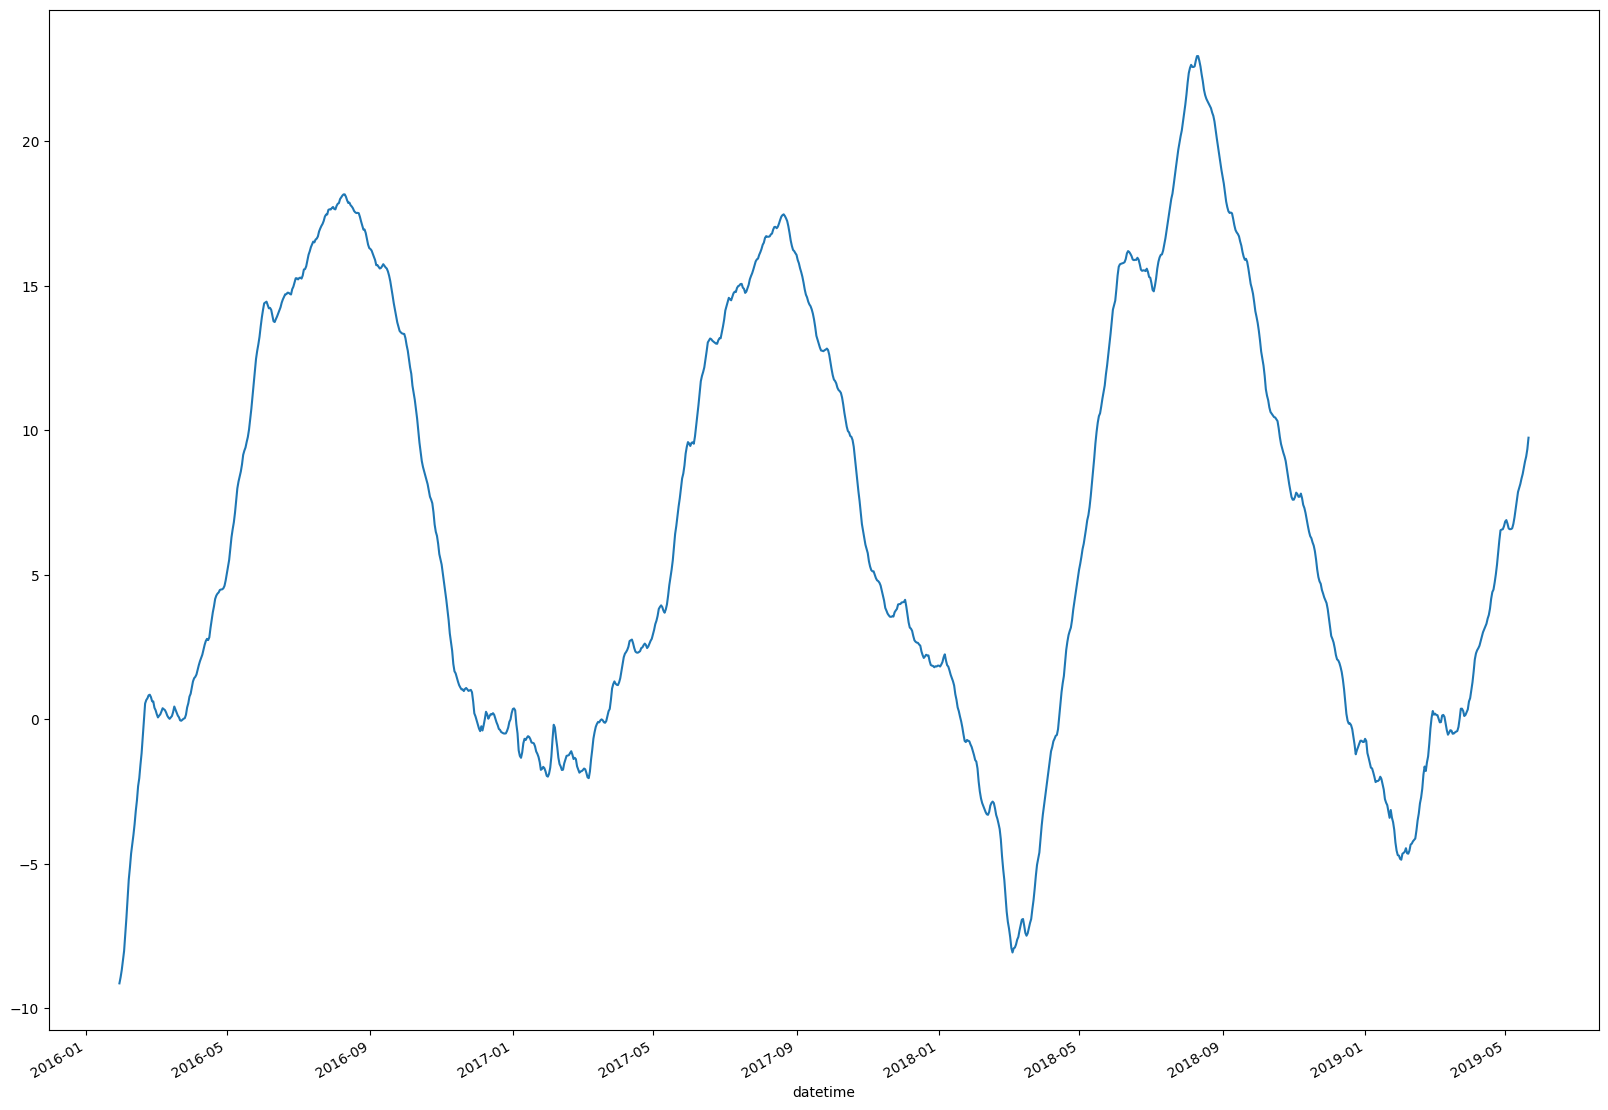

In [13]:
# Apply the Moving Average function by a subset of size 30 days. 
temp_df_mean = temp_df.T_mu.rolling(window=30).mean() 
temp_df_mean.plot(figsize=(20,15))